## Disciplina: Aprendizado Estatístico

### Estudo Dirigido 1
---
#### Exercício 1: Simulação de Intervalos de Confiança
Vamos simular o conceito de confiança estatística.

In [1]:
# Gerar uma população normal
pop <- rnorm(100000, 180, 20)
head(pop)

[1] 160.0691 202.3210 145.6840 185.7961 170.2034 191.8730

Esta população tem 100 mil observações normalmente distribuídas com média 180 e desvio padrão 20.

A confiança de 95% não é a probabilidade de que o intervalo contenha a média populacional, mas sim a proporção de intervalos que conteriam a verdadeira média se repetíssemos o experimento infinitas vezes.

In [2]:
# Coletar uma amostra de tamanho 100
x <- sample(pop, 100)

# Intervalo de confiança para a média
t.test(x)$conf.int

# Limite inferior
t.test(x)$conf.int[1]

# Limite superior
t.test(x)$conf.int[2]

# Verificar se 180 está no intervalo
t.test(x)$conf.int[1] < 180 & t.test(x)$conf.int[2] > 180

[1] 175.4029 184.0988
attr(,"conf.level")
[1] 0.95

[1] 175.4029

[1] 184.0988

[1] TRUE

Agora vamos repetir este processo 10 mil vezes:

In [3]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:10000) {
    x <- sample(pop, 100)
    l[i] <- (t.test(x)$conf.int[1] < 180 & t.test(x)$conf.int[2] > 180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.9515

a) Repita o procedimento para mais de 10 mil amostras.

In [4]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:50000) {
    x <- sample(pop, 100)
    l[i] <- (t.test(x)$conf.int[1] < 180 & t.test(x)$conf.int[2] > 180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.95024

Para o número de amostras igual à 50000 e nível de confiança igual à 0.95, obteve-se o valor experimental do nível de confiança igual à 0.95194. Em comparação a um número de amostras inferior, nota-se que o resultado atingido pelo segundo algoritmo é mais próximo da teoria, ou seja, a medida que o número de amostras tende ao infinito, o valor do nível de confiança experimental torna-se idêntico ao valor teórico.

b) Experimente com diferentes níveis de confiança.

In [5]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:10000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.90)$conf.int[1]<180 & t.test(x, conf.level=0.90)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.8989

In [6]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:50000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.90)$conf.int[1]<180 & t.test(x, conf.level=0.90)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.89998

In [7]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:10000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.97)$conf.int[1]<180 & t.test(x, conf.level=0.97)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.9714

In [8]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:50000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.97)$conf.int[1]<180 & t.test(x, conf.level=0.97)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.968

In [9]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:10000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.99)$conf.int[1]<180 & t.test(x, conf.level=0.99)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.9904

In [10]:
x <- NULL  # Para armazenar amostras
l <- NULL  # Para armazenar resultados lógicos

for(i in 1:50000){
  x <- sample(pop, 100)
  l[i] <- (t.test(x, conf.level=0.99)$conf.int[1]<180 & t.test(x, conf.level=0.99)$conf.int[2]>180)
}

# Proporção de intervalos que contêm a média populacional
sum(l)/length(l)

[1] 0.98958

Foram realizados três experimentos para a mesma população gerada, com mesmo número de amostras igual à 10000 e três níveis de confiança distintos iguais à: 0.90, 0.97 e 0.99. 

Neste contexto, os três resultados de nível de confiança experimental dos três algoritmos foram, respectivamente: 0.8989, 0.9714 e 0.9904.

E para o número de amostras igual à 50000, obtiveram-se, respectivamente: 0.89998, 0.968 e 0.98958. 

Confirmando a afirmativa de que o valor experimental da confiança se aproxima do valor teórico a medida que o número de amostras tende ao infinito.

---
#### Exercício 2: Estimadores Não Viciados e Teorema Central do Limite
Aproveitando o exercício anterior vamos entender dois conceitos :

* Estimadores não viciados;
* Teorema central do limite e Distribuição t-student.

Lembre-se que um estimador não viciado tem a sua Esperança igual ao parâmetro populacional. Por exemplo a Média amostral é um estimador não viciado para a média populacional:

$E(\bar{X})$ = $\mu$

Sabemos que a esperança também é um exercício de imaginação: Se fosse possível coletar infinitas amostras nas mesmas condições de uma população e para cada amostra calculasse a medida amostra a esperança seria a média destas medidas. Vamos simular isto. Vamos utilizar a mesma população do exercício anterior e gerar infinitas amostras (no nosso caso só 10 mil) e para cada uma calcular a média amostral:

In [11]:
x=NULL
media=NULL
for(i in 1:10000){
  x=sample(pop, 100)
  media[i]=mean(x)
}

Espera-se que se tirar a média amostral destas 10mil amostra que este valor se aproxime da média populacional ($\mu$ = 180):

In [12]:
# Média das médias amostrais
mean(media)

[1] 179.8838

Aumente o número de amostras (mais que 10 mil) e verifique que teremos uma aproximação melhor.

In [13]:
x=NULL
media=NULL
for(i in 1:50000){
  x=sample(pop, 100)
  media[i]=mean(x)
}
# Média das médias amostrais
mean(media)

[1] 179.8821

Agora vamos criar um estimador viciado para o desvio padrão (Subestima o desvio padrão populacional ($\sigma$), especialmente em amostras pequenas.):

$$
se(x) = \sqrt{ \frac{ \sum_{i=1}^{n} (x_i - \bar{x})^2 }{ n } }
$$

Onde:
- \( $x_i$ \) = cada valor da amostra  
- \( $\bar{x}$ \) = média amostral \( $\frac{1}{n} \sum_{i=1}^{n} x_i$ \)  
- \( $n$ \) = tamanho da amostra (`length(x)`)

No R poderemos fazer uma função para calcular esta quantidade:

In [14]:
se=function(x){
  return(sqrt(sum((x-mean(x))^2)/(length(x))))
}

Vamos calcular esta medida para infinitas amostras. 

Se esta medida for um estimador não viciado para o desvio padrão populacional esperamos que sua média fique perto de 20 ($\sigma = 20$).

In [15]:
x=NULL
see=NULL
for(i in 1:10000){
  x=sample(pop, 100)
  see[i]=se(x)
}
mean(see)

[1] 19.82155

Refaça o exemplo com o desvio padrão amostral não viciado $s$ e verifique o resultado.

$$
s = \sqrt{ \frac{ \sum_{i=1}^{n} (x_i - \bar{x})^2 }{ n-1 } }
$$

In [16]:
s=function(x){
  return(sqrt((sum((x-mean(x))^2)/(length(x)-1))))
}
for(i in 1:10000){
  x=sample(pop, 100)
  see[i]=s(x)
}
mean(see)

[1] 19.89094

Por que o viés ocorre?

* Ao calcular a variância amostral, usar $\bar{x}$ (média amostral) em vez de $\mu$ (média populacional) reduz artificialmente a dispersão.
* A divisão por $n−1$ compensa esse efeito, "inflando" ligeiramente a estimativa.

---
#### Teorema Central do Limite

Lembre: O teorema Central do limite também é um exercício de imaginação: Se fosse possível coletar infinitas amostras e, para cada uma destas amostras, calcularmos a média amostral teríamos como resultado que o gráfico destas médias teria forma de sino centrado na verdadeira média populacional.

Usando o exemplo anterior temos:

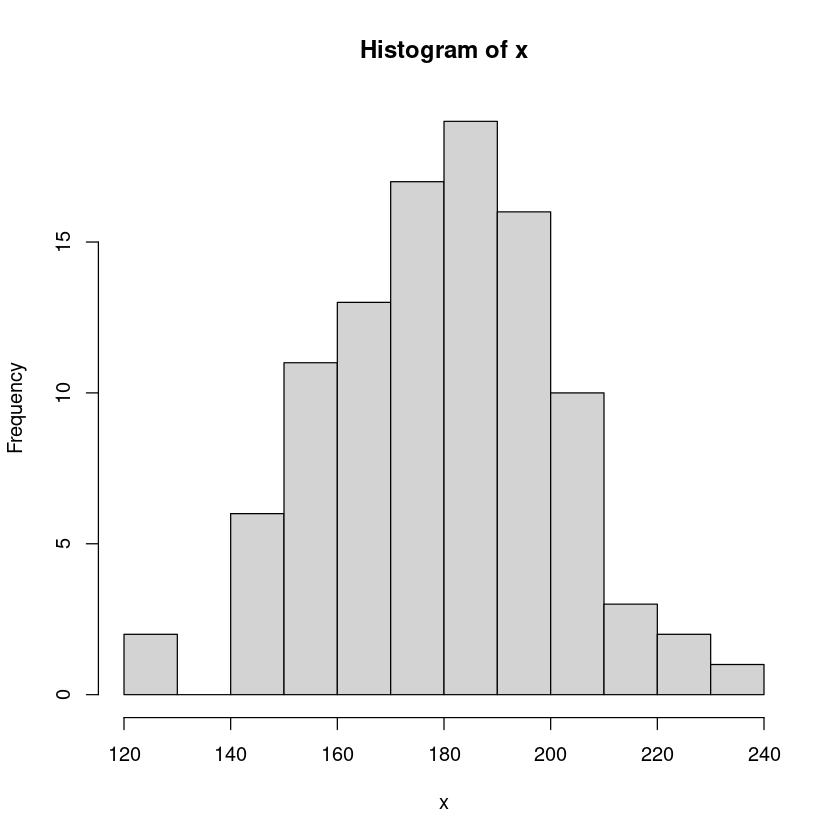

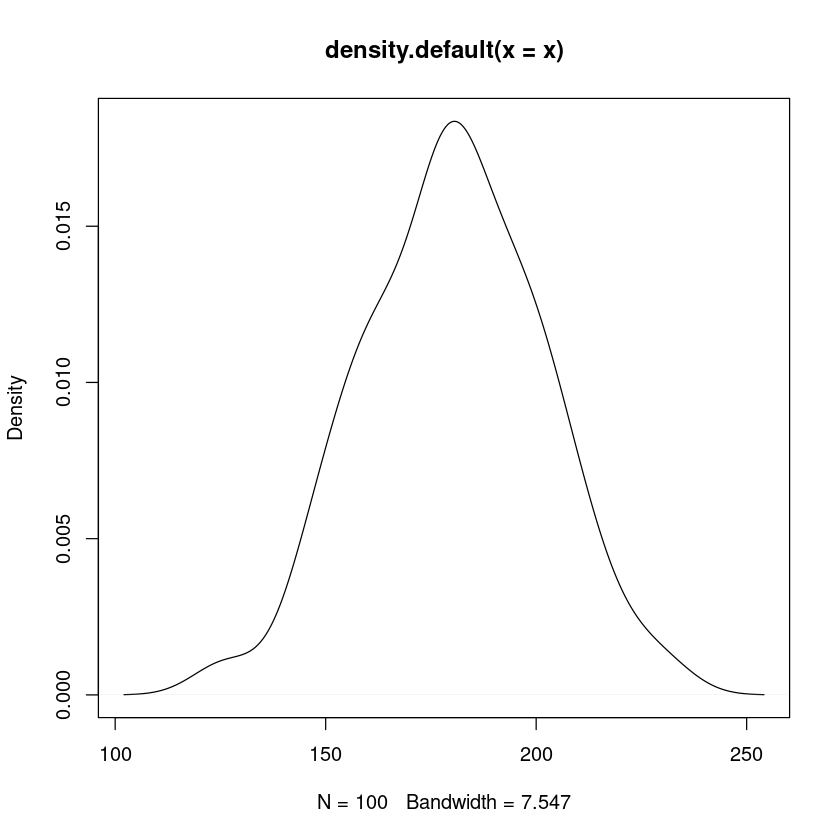

In [17]:
x=NULL
media=NULL
for(i in 1:90000){
  x=sample(pop, 100)
  media[i]=mean(x)
}
# Vamos fazer dois gráficos: Um histograma e um histograma suavizado
hist(x)
plot(density(x))

Porém o TCL não é válido para pequenas amostras ou distribuições muito assimétricas

- no caso de pequenas amostas a ocorrÊncia de um valor extremo altera muito o valor da média. Exemplo: Se pegarmos uma amostra de tamanho 5 da nossa população: 170, 174, 189, 181, 280

O valor 280 "puxa" o valor da média para cima. Então para amostras pequenas começaram a aparecer valores nas caudas e o teorema central do limite falha. Daí o William Gosset conseguiu uma solução: usar uma distribuição com caudas mais pesadas (t-Student)

- Para o segundo caso até conseguimos normalidade mas com amostras muito grandes (geralmente acima de 1000 itens)

Vamos comparar uma amostra pequena e uma amostra grande em nosso exercício de imaginação. Vamos plotar os dois resultados no mesmo gráfico:

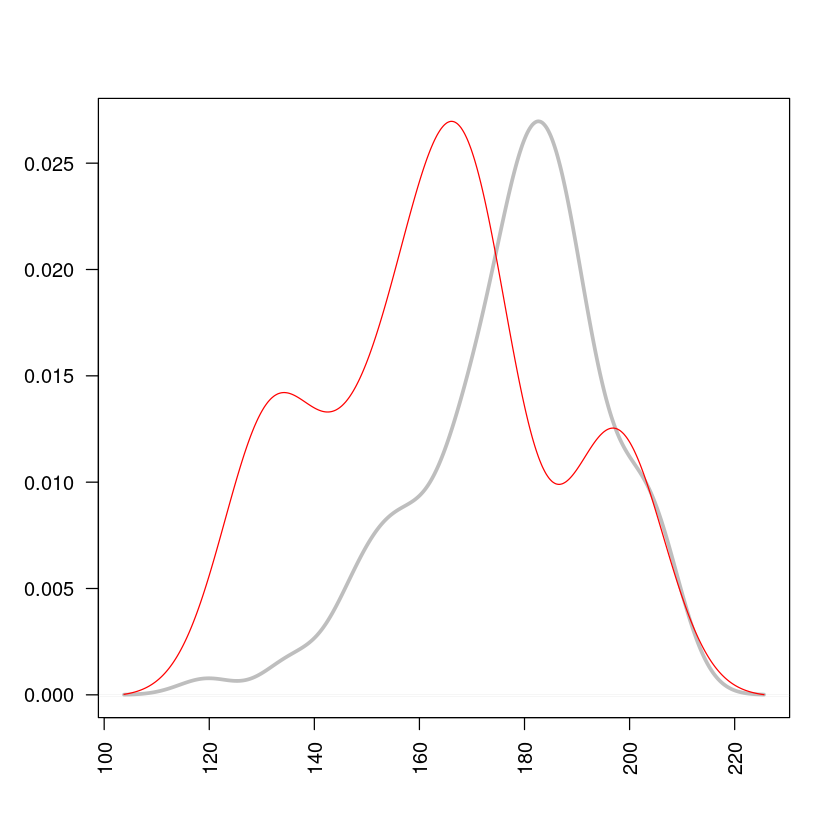

In [18]:
x = NULL # vamos usar para as amostras grandes
y = NULL # vamos usar para amostras pequenas
media = NULL # vamos usar para armazenar as médias das amostras grandes
media1 = NULL # vamos usar para armazenar as médias das amostras pequenas

for(i in 1:30000){
    x = sample(pop, 100)
    y = sample(pop, 10)
    media[i] = mean(x)
    media1[i] = mean(x)
}

# E o gráfico
plot(density(x), lwd=3, col='grey', ann=FALSE, las=2)
par(new=TRUE)
plot(density(y), ann=FALSE, axes=FALSE, col='red')

a) Refaça o exercício para diferentes tamanhos de amostra para x e y.

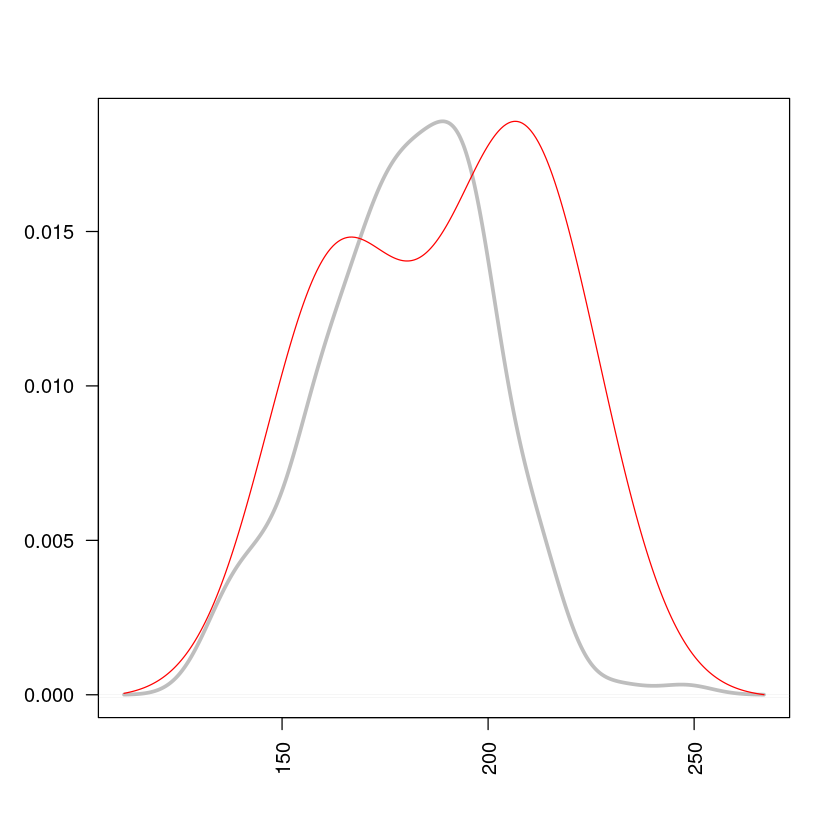

In [19]:
# Multiplicou-se o tamanho de x por 2 e dividiu-se o tamanho de y por 2, então, size(x) = 200 e size(y) = 5

x = NULL
y = NULL
media = NULL
media1 = NULL

for(i in 1:30000){
    x = sample(pop, 100*2)
    y = sample(pop, 10/2)
    media[i] = mean(x)
    media1[i] = mean(x)
}

# E o gráfico
plot(density(x), lwd=3, col='grey', ann=FALSE, las=2)
par(new=TRUE)
plot(density(y), ann=FALSE, axes=FALSE, col='red')

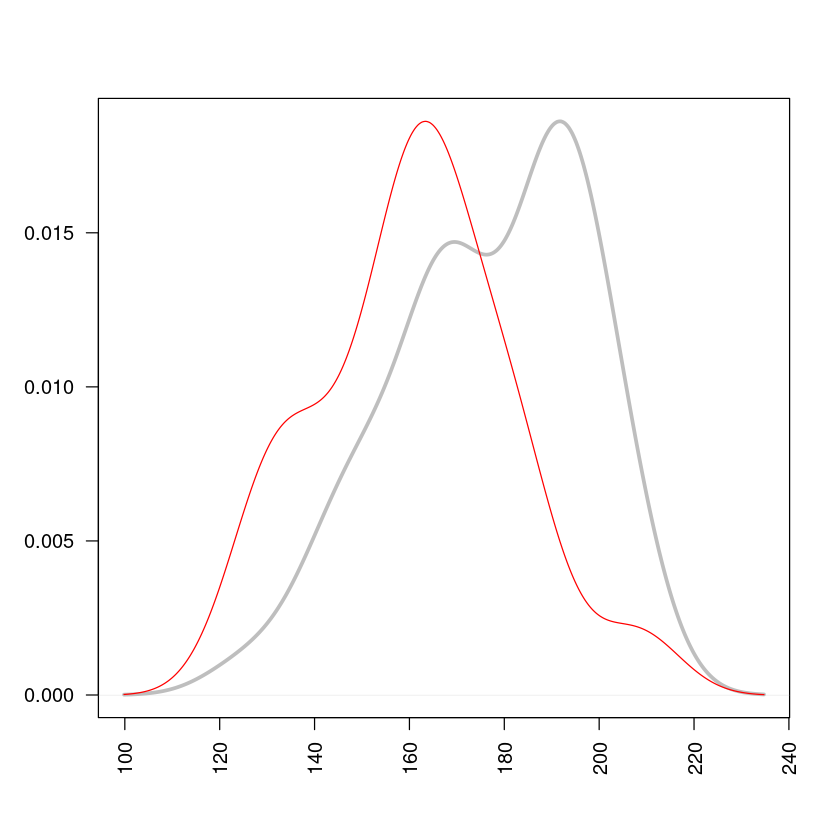

In [20]:
# Dividiu-se o tamanho de x por 2 e multiplicou-se o tamanho de y por 2, então, size(x) = 50 e size(y) = 20

x = NULL
y = NULL
media = NULL
media1 = NULL

for(i in 1:30000){
    x = sample(pop, 100/2)
    y = sample(pop, 10*2)
    media[i] = mean(x)
    media1[i] = mean(x)
}

# E o gráfico
plot(density(x), lwd=3, col='grey', ann=FALSE, las=2)
par(new=TRUE)
plot(density(y), ann=FALSE, axes=FALSE, col='red')

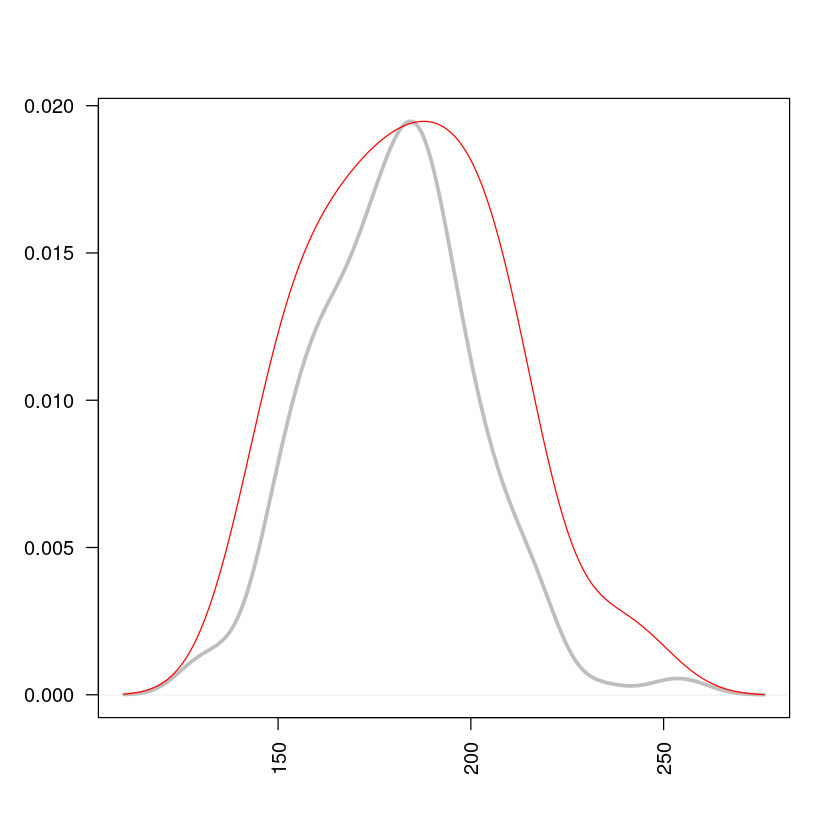

In [21]:
# Multiplicaram-se os tamanhos de x e de y por 2, então, size(x) = 200 e size(y) = 20

x = NULL
y = NULL
media = NULL
media1 = NULL

for(i in 1:30000){
    x = sample(pop, 100*2)
    y = sample(pop, 10*2)
    media[i] = mean(x)
    media1[i] = mean(x)
}

# E o gráfico
plot(density(x), lwd=3, col='grey', ann=FALSE, las=2)
par(new=TRUE)
plot(density(y), ann=FALSE, axes=FALSE, col='red')

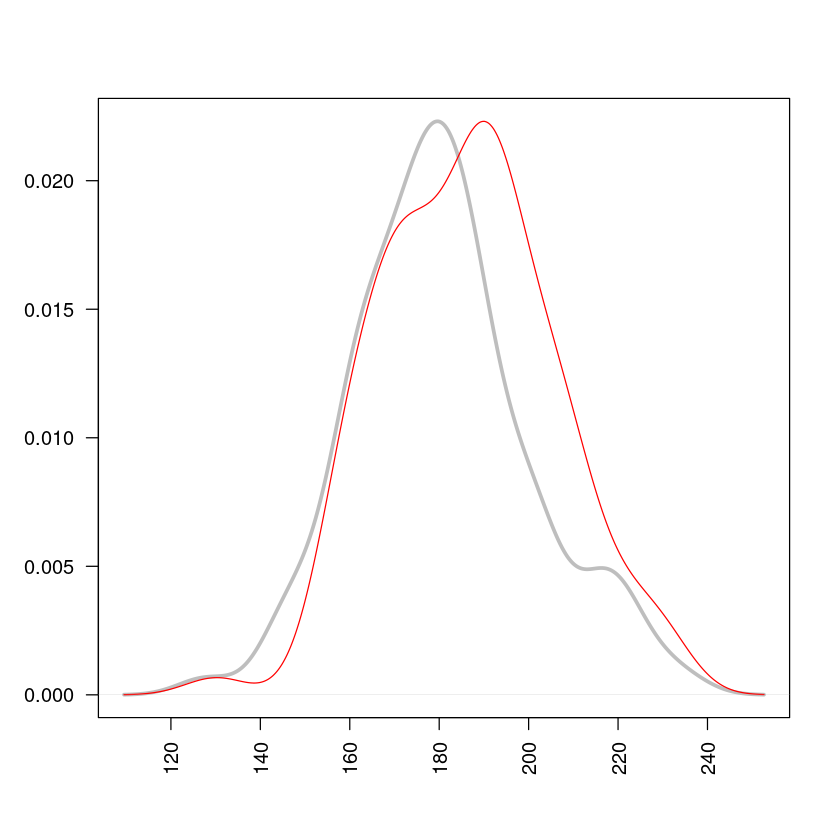

In [22]:
# Mantiveram-se os dois tamanhos idênticos, então, size(x) = 100 e size(y) = 100

x = NULL
y = NULL
media = NULL
media1 = NULL

for(i in 1:30000){
    x = sample(pop, 100)
    y = sample(pop, 100)
    media[i] = mean(x)
    media1[i] = mean(x)
}

# E o gráfico
plot(density(x), lwd=3, col='grey', ann=FALSE, las=2)
par(new=TRUE)
plot(density(y), ann=FALSE, axes=FALSE, col='red')

Observando-se as imagens acima, nota-se com clareza que o baixo número de amostras acarreta em valores nas caudas e, a medida que este número se eleva, estes valores tornam-se menos expressivos.

---
#### Exercício 3: Comparação de Dois Algoritmos
Considere que seu trabalho é comparar o desempenho de dois algoritmos (A e B) de visão computacional, que usam métodos diferentes para geração de digitais humanas realistas.

- São sistema complexos cuja execução leva tempos longos para geração das digitais. O sistema A foi testado 8 vezes e o sistema B apenas 5, onde em cada experimento utilizou-se o mesmo padrão de resultado a obter.

- Os tempos de teste dos algoritmos estão na tabela a seguir. Com base nesses resultados, pede-se que se determine qual algoritmo teve melhor desempenho com 5% de significância.

- Inicialmente coloque os dados no R-studio:

| Algoritmo A | Algoritmo B |
|-------------|-------------|
| 1062        | 1073        |
| 1081        | 1141        |
| 1116        | 1051        |
| 1053        | 1040        |
| 1103        | 1113        |
| 1086        | 1111        |
| 1135        | 1099        |
| 1133        | 1028        |
| 1136        | 1059        |
| 1123        | 1081        |
| 1095        | 1065        |
| 1132        | 1106        |
| 1098        | 1019        |
| 1069        | 1130        |
| 1058        | 1120        |
| 1092        | 1070        |
| 1073        | 1083        |
| 1110        | 1010        |
| 1104        |             |
| 1061        |             |

Faça o boxplot para tentar perceber se há diferença entre as amostras e discorra sobre o que você enxerga neste gráfico.:

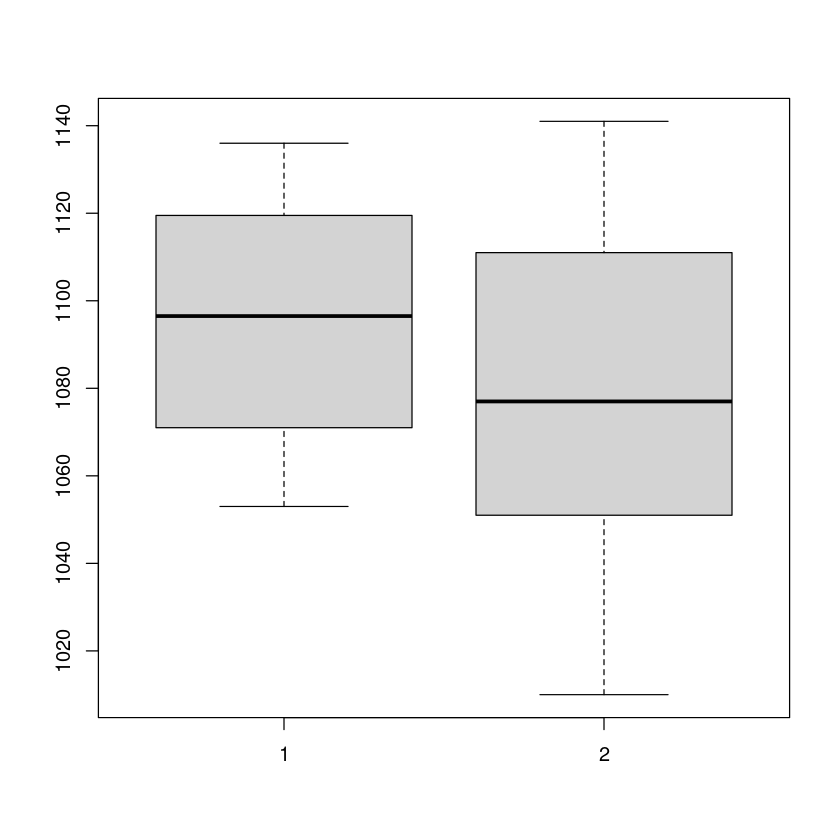

In [23]:
a=c(1062,1081,1116,1053,1103,1086,1135,1133,1136,1123,1095,1132,1098,1069,1058,1092,1073,1110,1104,1061)
b=c(1073,1141,1051,1040,1113,1111,1099,1028,1059,1081,1065,1106,1019,1130,1120,1070,1083,1010)
boxplot(a,b)

Ao se observar cada um dos boxplots, pode-se concluir que o primeiro (algoritmo A, ou 1) apresentou um desempenho mais uniforme, ou seja, com menor variância nas amostras coletadas, uma vez que os dados estão mais próximos da mediana. Em contrapartida, o segundo (algoritmo B, ou 2) gerou resultados mais variados e, assim, menos uniforme.

O teste necessário, assumindo normalidade dos dados, é um teste t não pareado. Inicialmente vamos fazer o seguinte teste:

- Hipótese Nula ($H_0$):
$$
\mu_A = \mu_B \quad \text{(Os algoritmos têm desempenho médio igual)}
$$

- Hipótese Alternativa ($H_a$): $\mu_A \neq \mu_B \quad \text{(Os algoritmos têm desempenho médio diferente)}$

Onde:
- $\mu_A$ = média populacional do Algoritmo A
- $\mu_B$ = média populacional do Algoritmo B

Para fazer este teste é necessário ver se a variância das populações podem ser consideradas iguais:

- $H_0: \sigma^2_A = \sigma^2_B$

- $H_a: \sigma^2_A \neq \sigma^2_B$

Neste caso é usamos um teste da razão de variâncias que faz uso da distribuição F-Snedecor:

In [24]:
var.test(a,b)


	F test to compare two variances

data:  a and b
F = 0.51073, num df = 19, denom df = 17, p-value = 0.1591
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.193964 1.311047
sample estimates:
ratio of variances 
         0.5107326 


Qual foi o p-valor do teste?

- Observando o resultado acima, temos que o p-valor obtido foi igual à 0.1591. 

A que conclusão chegamos?

- Em comparação ao nível de significância ($\alpha$) igual à 0.05, conclui-se que, para o teste da razão de variâncias que faz uso da distribuição F-Snedecor (teste F), deve-se falhar em rejeitar a hipótese nula, uma vez que o p-valor > $\alpha$. Logo, assumimos que não existe diferença significativa entre as variâncias. Esta conclusão contradiz com as afirmações feitas sobre a análise dos boxplots, ou seja, cabe ao tomador de decisão avaliar as ferramentas e seus resultados para a determinada aplicação.

Se o p-valor for maior que o nível de significância assumiremos variâncias populacionais iguais e faremos o teste t para duas amostras usando o seguinte comando:

In [25]:
t.test(a, b, alternative = 'two.sided', mu = 0, paired = FALSE, var.equal =TRUE, conf.level = 1-0.05)


	Two Sample t-test

data:  a and b
t = 1.6897, df = 36, p-value = 0.09973
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.660637 40.216193
sample estimates:
mean of x mean of y 
 1096.000  1077.722 


A que conclusão chegamos usando 5% de significância?

- Pelo resultado do teste t para duas amostras também observa-se que o p-valor > $\alpha$ e mais uma vez falha em rejeitar a hipótese nula. Portanto, para o nível de significância de 5% as médias não apresentam diferença significativa.

---
#### Exercício 4: Simulação do Erro Tipo I

i) Gere os dados de uma população qualquer

In [26]:
populacao=rnorm(100000,23,17)

ii) Obtenha uma amostra de tamanho 20 desta população

In [27]:
amostra=sample (populacao,20)

iii) faça um teste de hipóteses
- $H_0: \mu_A = 23$

- $H_a: \mu_A \neq 23$

In [28]:
t.test (amostra,
alternative = "two.sided",
mu = 23, paired = FALSE,
conf.level = 1-0.005)


	One Sample t-test

data:  amostra
t = -0.79443, df = 19, p-value = 0.4368
alternative hypothesis: true mean is not equal to 23
99.5 percent confidence interval:
  8.854489 31.481585
sample estimates:
mean of x 
 20.16804 


o comando acima, faz um teste de hipóteses com a = 0.005. Podemos obter somente o p-valor com o comando:

In [29]:
p=t.test (amostra,
alternative = "two.sided",
mu = 23, paired = FALSE,
conf.level = 1-0.005)

p$p.value

[1] 0.4367539

iv) Agora vamos chegar a probabilidade do erro tipo 1 do teste

In [30]:
# iniciaondo o contador
contador=0

# Vamos simular a obtenção de "infinitas" e para cada %! uma vamos ver se o tes
for(i in 1:30000) {
amostra=sample (populacao,20)

p=t.test (amostra,
alternative = "two.sided",
mu = 23, paired = FALSE,
conf.level = 1-0.005)

# abaixo se o pvalor for menor que alpha, rejeitamos h0 e o contador é a
# caso contrário o contador recebe zero
contador=ifelse(p$p.value<0.005,1,0)+contador
}

# Proporção de vezes que a h0 foi rejeitada no caso #### incorretamente

contador/30000

[1] 0.0053

v) Qual a sua percepção deste exercícios?

- Conforme o resultado apresentado acima, o contador apontou 160 rejeições de 30000 execuções, isto é, a probabilidade de erro tipo 1 é aproximadamente 0.5334%. Essa probabilidade representa a proporção de vezes que a hipótese nula foi rejeitada em relação ao número total de testes. Neste exemplo específico, parece que a probabilidade de rejeição é relativamente baixa, indicando que a hipótese nula foi geralmente mantida na maioria dos testes.

---
#### Exercício 5: Teste de Igualdade de Médias para Três Populações

Agora queremos testar a igualdade de média de três populações.

- $H_0: \mu_A = \mu_B = \mu_C$

- $H_a: \text{Pelo menos uma é diferente.}$

i) Para isto vamos gerar três populações:

In [31]:
populacao1=rnorm(100000,23,15)
populacao2=rnorm(100000,23,11)
populacao3=rnorm(100000,23,19)

ii) Vamos verificar o erro de fazer um teste 2 a 2, sendo:

- A e B:

$H_0: \mu_A = \mu_B$

$H_a: \mu_A \neq \mu_B$


- A e C:

$H_0: \mu_A = \mu_C$

$H_a: \mu_A \neq \mu_C$

- B e C:

$H_0: \mu_B = \mu_C$

$H_a: \mu_B \neq \mu_C$

iii) A ideia é pegar repetidas amostras e verificar quantas vezes foi rejeitada a hipótese nula em todos os testes. Para isto usaremos o comando (estamos assumindo $\alpha = 0.005$):

In [33]:
# Iniciando o contador
contador=0

# Vamos simular a obtenção de "infinitas" e para cada uma vamos ver se o teste rejeitou ou não a hipótese nula
for(i in 1:30000){
    amostra1=sample(populacao1,20)
    amostra2=sample(populacao2,20)
    amostra3=sample(populacao3,20)
    p1 = t.test(amostra1,amostra2,
              alternative = "two.sided",
              mu=0, paired = FALSE, var.equal = FALSE,
              conf.level = 1-0.005)
    p2 = t.test(amostra1,amostra3,
              alternative = "two.sided",
              mu=0, paired = FALSE, var.equal = FALSE,
              conf.level = 1-0.005)
    p3 = t.test(amostra2,amostra3,
              alternative = "two.sided",
              mu=0, paired = FALSE, var.equal = FALSE,
              conf.level = 1-0.005)
    
    # Abaixo se o p-valor for menor que alpha rejeitamos h0 e o contador é acrescido de 1 unidade, caso contrário o contador recebe zero
    # Usamos "|" como "ou" lógico
    contador=ifelse(p1$p.value<0.005|p2$p.value<0.005|p3$p.value<0.005,1,0)+contador
}
# Proporção de rejeições incorretas
contador
contador/30000

[1] 429

[1] 0.0143

iv) Qual a sua impressão do item anterior?

- Pelo resultado do teste t 2 a 2 apresentado, o contador atingiu 429 rejeições de 30000 execuções, portanto, uma probabilidade de 1.43% para a tendência do erro tipo 1. Este valor continua relativamente baixo em comparação ao número de testes total, porém houve um aumento em comparação ao exercício anterior. Isto se deve ao fato de que agora são 3 populações com desvios padrão distintos e 3 testes de hipóteses, aumentando as chances de ocorrerem falsos positivos durante a análise.